### Introduction to Linear Regression
Linear Regression can be treated as one of the basic algorithms which has been used on paper for a long time before it started getting coded on the computers. A lot of econometrics student encounter this algorithm in their studies. This is an example of a **Supervised Machine Learning** algorithm. 

<br>**SUPERVISED LEARNING ALGORITHM**
<br>Supervised Learning algorithms are type of algorithms where we have the features as well as outcome of the train dataset and we use the features of the test data-set to generate the outcome variables for test datasets. 

<br>You could be interested in multiple problems which can be solved by the linear regression:
- How far the ball go up if you throw the ball with an initial velocity of v m/s (might have been required prior to Newton)
- How much insurance premium may be required based on the age of a customer
- What will be the profit generated if you add feature #1, 2, 3 ... n for a particular app

**MATHEMATICS BEHIND REGRESSION**
<br>We will come to the steps required for the regression mode but before that let us understand some mathematics behind the regression models.
<br><center> Y = $\beta_0 + \beta_1X + \epsilon$</center>

<br>We generally have n data-points associated, for which we want to predict. (Remember we are trying to estimate the values of these parameters $\beta_0, \beta_1$ statistically) and not trying to solve these equations for exact values (remember there are 2 variables and n equations and there is very low probability for these equations to agree to a single solution).

Therefore we have:
<br><center> $Y_i = \beta_0 + \beta_1X_i + \epsilon_i$</center> 

If we re-write this equation we arrive at an equation:
<br><center> $\epsilon_i = Y_i - \beta_0 - \beta_1X_i$</center> 

Now we try to find values of $\beta_1$ and $\beta_0$ which minimize the value of the $\epsilon$ parameter in general (statistically). 
<br>For the same we compute value of **Squared Sum Errors** (or sum of squared errors) also known as SSE. 
<br><center>SSE = $\large \sum_{i=1}^{i=n} \epsilon_i$ = $\large \sum_{i=1}^{i=n} Y_i - \beta_0 - \beta_1X_i$</center>

Same equation can be extrapolated to multiple variables. As
<center>$Y_i = \beta_0 + \beta_1X_i + \beta_2X_i + \beta_3X_i + ... + \beta_nX_i$ </center>

**COLLECTING THE DATA**
<br>First step of Linear Regression Model and any model for that matter is collection of the data. Here we will be using the Insurance Cost Data set which is available on Kaggle. 

In [2]:
import pandas as pd
insurance_cost = pd.read_csv("Insurance_Cost.csv")

In [3]:
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Following can be inferred from the above table:
- All the data points are complete (Otherwise at-least one of the variable will have different non-null count)
- There are 4 Numerical Variables: Age, BMI, Children, Charges
- There are 3 Categorical Variables: Sex, Smoker, Region
<br>We can do some preprocessing in the data, which we will come to now. 
<br>Also, there is a detailed EDA required on this data set which we will cover separately. 

**DEALING WITH CATEGORICAL VARIABLES**
<br>As you saw above the equation for Linear Regression cannot take categorical variables and it expects only numerical variable. However, we can convert categorical variables into numerical variables by encoding them. 
<br>Encoding is nothing but defining 0 or 1 for each level of categorical variables. 
<br>Let us take examples from our data sets:
- Sex will have two levels - M and F we can encode this as binary variable 0 for Male and 1 for Female
- Smoker again will have two levels - Y or N which can be converted into binary variable
- Region is a little bit more complicated for Region we will deploy 0/1 for each region
<br>Let us understand it in a bit more detail.

In [4]:
insurance_cost['smoker'].unique() ##Giving two levels of unique points

array(['yes', 'no'], dtype=object)

In [5]:
insurance_cost['sex'].unique() ##Giving two levels of unique points

array(['female', 'male'], dtype=object)

In [6]:
insurance_cost['region'].unique() ##Giving 4 levels of unique points

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
pd.get_dummies(insurance_cost['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


For other variables there is a lot more easier (and faster method). We can use ```np.where``` function.

In [8]:
import numpy as np
insurance_cost['smoker']=np.where(insurance_cost['smoker']== 'yes',1,0)
insurance_cost['sex'] = np.where(insurance_cost['sex']=='female',1,0)
#Works very similar to the if-else condition in excel

Let us list down the predictor variables in our data (X-Variables) to understand list of variables which will be impacting our result.

In [9]:
insurance_cost_revised= pd.get_dummies(insurance_cost,columns = ['region'],drop_first = True)

Here we are using ```drop_first = True``` because for K variables we want to create K-1 dummy variables.
<br>So essentially we reduce number of categorical variables from K = K-1 
<br>Because for the model it is understood if none of these variables are true then the other value will be true. One of the fundamental requirement of the a linear regression model is that the variables should be independent of each other. 

<br>We can cover the proof of the linear regression models as well, if required. Before that let us extract the features (predictor variables or x variables) first. 

In [10]:
Charges = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])

We have created the Y variable data set now we need to choose X variable dataset.

In [11]:
insurance_cost_revised.columns
X_variables = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'charges']

In [12]:
##You might have to install statsmodels package using !pip install statsmodels
import statsmodels.api as sm

In [13]:
Y_var = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])

In [14]:
type(Y_var)

pandas.core.frame.DataFrame

In [15]:
X_variables.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [16]:
Y_var

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Now let us split our data into test and train set for that we will import ```train_test_split``` package from ```sklearn.model_selection``` library. 
<br>```sklearn``` is probably the most famous package for machine learning.
<br>We also add a constant for .... ```CHECK WHY DO YOU ADD CONSTANT```

In [17]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_variables = sm.add_constant(X_variables)

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X_variables,Y_var,
                                                   train_size = 0.80,
                                                   random_state = 121)

In [19]:
model_1 = sm.OLS(train_y,train_X).fit()

In [20]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.745     
Dependent Variable:     charges             AIC:                   21699.6385
Date:                   2022-05-13 14:46    BIC:                   21744.4172
No. Observations:       1070                Log-Likelihood:        -10841.   
Df Model:               8                   F-statistic:           391.7     
Df Residuals:           1061                Prob (F-statistic):    2.11e-310 
R-squared:              0.747               Scale:                 3.7273e+07
-----------------------------------------------------------------------------
                    Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------
const            -11313.7596 1127.9646 -10.0302 0.0000 -13527.0544 -9100.4648
age                 254.5564   13.3684  19.0416 0.0000    228.3248   280.7879
sex                  70.1087  376.7069   0.1861 0.8524   -669.0666   809.2839
bmi                 313.2344   32.3448   9.6842 0.0000    249.7674   376.7014
children            432.1599  154.0986   2.8044 0.0051    129.7873   734.5326
smoker            23984.5162  470.2144  51.0076 0.0000  23061.8605 24907.1720
region_northwest    -42.4843  530.2868  -0.0801 0.9362  -1083.0144   998.0458
region_southeast   -914.7633  540.3832  -1.6928 0.0908  -1975.1044   145.5779
region_southwest   -623.4325  537.3545  -1.1602 0.2462  -1677.8308   430.9657
-----------------------------------------------------------------------------
Omnibus:                  269.759          Durbin-Watson:             2.006  
Prob(Omnibus):            0.000            Jarque-Bera (JB):          710.565
Skew:                     1.303            Prob(JB):                  0.000  
Kurtosis:                 6.024            Condition No.:             316    
=============================================================================

"""

**FIRST STEPS IN THE MODEL VALIDATION**
<br>We have created our first model. Now we need to understand the results let us see what each of these results mean and what will be our first steps.

<img src="Images/Linear_Regression Result.jpeg" width="800">

Our primary focus here will be the middle table (elements in Purple Color). Remaining elements are as follows:
- Yellow & Blue Elements: These are the discription of the model
- Red Elements: Most critical and are used for the goodness of the model. How well the model predicts
- Black Elements: Are used to test how well the model follows statistical assumptions of OLS (Ordinary Least Square)
- Purple Elements: Used to decide the Independent Variables which are used for the model

**Selection of most important features**:
While selecting the features of the models we perform a simple Hypothesis Test:
<br><center>$H_0: \beta_i = 0$</center>
<br><center>$H_1: \beta_i \neq 0$</center>

<br>If you remember the premise of hypothesis testing when p-value < 0.05 then we reject the null hypothesis at a significance level of 5%. Now this means if any of the variable has P-Value < 0.05 means as per above test its cooeficient is **NOT EQUAL** to Zero and therefore should feature in our testing framework. Similarly if any variable has P-Value > 0.05 we can conclude that the coefficient for that variable is Zero and therefore can be excluded. 

We choose the variable with highest P-value remove it and then see the impact on the model and then choose the next highest P-Value variable (in the new Model) and contiue doing it till all the variables have P-Value < 0.05. 

This is called **BACKWARD ELIMINATION**

Here we see P-Value associated with ```region North-west``` is the highest we remove that variable and run the model again. 

In [21]:
insurance_cost_revised = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'region_northwest']
insurance_cost_revised.head()

,age,sex,bmi,children,smoker,charges,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,1
1,18,0,33.770,1,0,1725.55230,1,0
2,28,0,33.000,3,0,4449.46200,1,0
3,33,0,22.705,0,0,21984.47061,0,0
4,32,0,28.880,0,0,3866.85520,0,0


Let us do the ordeal of:
- Splitting of X_Variables and Y_variables (You can avoid this step by running below steps on X and Y variables but I am intentionally not doing this will explain the same soon)
- Adding the constant term
- Splitting the data in Test and Train
- Running the OLS model 

<br>AGAIN !!!

In [22]:
X_variables = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'charges']
Y_var = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_variables = sm.add_constant(X_variables)
print(Y_var.head())
print(X_variables.head())

       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520
   const  age  sex     bmi  children  smoker  region_southeast  \
0    1.0   19    1  27.900         0       1                 0   
1    1.0   18    0  33.770         1       0                 1   
2    1.0   28    0  33.000         3       0                 1   
3    1.0   33    0  22.705         0       0                 0   
4    1.0   32    0  28.880         0       0                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  


In [23]:
train_X, test_X, train_y, test_y = train_test_split(X_variables,Y_var,
                                                   train_size = 0.80,
                                                   random_state = 121)

In [24]:
model_2 = sm.OLS(train_y,train_X).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.745     
Dependent Variable:     charges             AIC:                   21697.6449
Date:                   2022-05-13 14:46    BIC:                   21737.4482
No. Observations:       1070                Log-Likelihood:        -10841.   
Df Model:               7                   F-statistic:           448.1     
Df Residuals:           1062                Prob (F-statistic):    9.64e-312 
R-squared:              0.747               Scale:                 3.7238e+07
-----------------------------------------------------------------------------
                    Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------
const            -11334.0130 1098.7561 -10.3153 0.0000 -13489.9924 -9178.0336
age                 254.5494   13.3619  19.0504 0.0000    228.3307   280.7680
sex                  69.0839  376.3135   0.1836 0.8544   -669.3187   807.4864
bmi                 313.2487   32.3292   9.6894 0.0000    249.8124   376.6850
children            431.4552  153.7753   2.8058 0.0051    129.7172   733.1932
smoker            23985.5171  469.8285  51.0516 0.0000  23063.6196 24907.4146
region_southeast   -893.7392  472.1656  -1.8929 0.0586  -1820.2227    32.7443
region_southwest   -602.1868  467.1408  -1.2891 0.1976  -1518.8107   314.4371
-----------------------------------------------------------------------------
Omnibus:                  269.667          Durbin-Watson:             2.006  
Prob(Omnibus):            0.000            Jarque-Bera (JB):          710.009
Skew:                     1.303            Prob(JB):                  0.000  
Kurtosis:                 6.023            Condition No.:             305    
=============================================================================

"""

There is a very little change in the model now let us run the model with removal of ```sex``` variable as that has the highest P-value. We will do the entire thing in one go instead of separate segments of the codes. Remember our ```insurance_cost_revised``` doesn't have ```region_northwest``` anymore as we had removed it in the first step. 

In [25]:
#Removing the sex variable
insurance_cost_revised = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'sex']
print(insurance_cost_revised.head())

#Splitting of X and Y variables
X_variables = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'charges']
Y_var = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_variables = sm.add_constant(X_variables)
print(Y_var.head())
print(X_variables.head())

#Splitting of test and train cases
train_X, test_X, train_y, test_y = train_test_split(X_variables,Y_var,
                                                   train_size = 0.80,
                                                   random_state = 121)
#Running the model
model_3 = sm.OLS(train_y,train_X).fit()
model_3.summary2()

   age     bmi  children  smoker      charges  region_southeast  \
0   19  27.900         0       1  16884.92400                 0   
1   18  33.770         1       0   1725.55230                 1   
2   28  33.000         3       0   4449.46200                 1   
3   33  22.705         0       0  21984.47061                 0   
4   32  28.880         0       0   3866.85520                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520
   const  age     bmi  children  smoker  region_southeast  region_southwest
0    1.0   19  27.900         0       1                 0                 1
1    1.0   18  33.770         1       0                 1                 0
2    1.0   28  33.000         3       0                 1                 0
3    1.0   33  22.705         0       0                 0              

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.746     
Dependent Variable:     charges             AIC:                   21695.6789
Date:                   2022-05-13 14:46    BIC:                   21730.5068
No. Observations:       1070                Log-Likelihood:        -10841.   
Df Model:               6                   F-statistic:           523.2     
Df Residuals:           1063                Prob (F-statistic):    4.11e-313 
R-squared:              0.747               Scale:                 3.7204e+07
-----------------------------------------------------------------------------
                    Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------
const            -11288.2285 1069.5911 -10.5538 0.0000 -13386.9782 -9189.4789
age                 254.6333   13.3480  19.0765 0.0000    228.4419   280.8247
bmi                 312.8154   32.2282   9.7063 0.0000    249.5772   376.0536
children            430.7366  153.6556   2.8033 0.0052    129.2338   732.2393
smoker            23976.8888  467.2592  51.3139 0.0000  23060.0337 24893.7439
region_southeast   -891.8638  471.8405  -1.8902 0.0590  -1817.7083    33.9808
region_southwest   -601.9816  466.9271  -1.2892 0.1976  -1518.1852   314.2220
-----------------------------------------------------------------------------
Omnibus:                  269.727          Durbin-Watson:             2.006  
Prob(Omnibus):            0.000            Jarque-Bera (JB):          710.349
Skew:                     1.303            Prob(JB):                  0.000  
Kurtosis:                 6.024            Condition No.:             296    
=============================================================================

"""

We see a small improvement in ```adjusted R-squared``` from 0.745 to 0.746. Let us repeat the above steps for the last variable with P > 0.05 which is ```region_southwest``` and run the model

In [26]:
#Removing the region_southwest variable
insurance_cost_revised = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'region_southwest']
print(insurance_cost_revised.head())

#Splitting of X and Y variables
X_variables = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'charges']
Y_var = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_variables = sm.add_constant(X_variables)
print(Y_var.head())
print(X_variables.head())

#Splitting of test and train cases
train_X, test_X, train_y, test_y = train_test_split(X_variables,Y_var,
                                                   train_size = 0.80,
                                                   random_state = 121)
#Running the model
model_4 = sm.OLS(train_y,train_X).fit()
model_4.summary2()

   age     bmi  children  smoker      charges  region_southeast
0   19  27.900         0       1  16884.92400                 0
1   18  33.770         1       0   1725.55230                 1
2   28  33.000         3       0   4449.46200                 1
3   33  22.705         0       0  21984.47061                 0
4   32  28.880         0       0   3866.85520                 0
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520
   const  age     bmi  children  smoker  region_southeast
0    1.0   19  27.900         0       1                 0
1    1.0   18  33.770         1       0                 1
2    1.0   28  33.000         3       0                 1
3    1.0   33  22.705         0       0                 0
4    1.0   32  28.880         0       0                 0


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.745     
Dependent Variable:     charges             AIC:                   21695.3507
Date:                   2022-05-13 14:46    BIC:                   21725.2031
No. Observations:       1070                Log-Likelihood:        -10842.   
Df Model:               5                   F-statistic:           627.2     
Df Residuals:           1064                Prob (F-statistic):    3.57e-314 
R-squared:              0.747               Scale:                 3.7228e+07
-----------------------------------------------------------------------------
                    Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------
const            -11383.4991 1067.3673 -10.6650 0.0000 -13477.8830 -9289.1152
age                 254.8892   13.3507  19.0919 0.0000    228.6926   281.0858
bmi                 309.3159   32.1237   9.6289 0.0000    246.2829   372.3489
children            425.4367  153.6484   2.7689 0.0057    123.9484   726.9250
smoker            23979.1108  467.4014  51.3030 0.0000  23061.9777 24896.2439
region_southeast   -684.2384  443.6445  -1.5423 0.1233  -1554.7559   186.2791
-----------------------------------------------------------------------------
Omnibus:                  271.435          Durbin-Watson:             2.008  
Prob(Omnibus):            0.000            Jarque-Bera (JB):          717.527
Skew:                     1.310            Prob(JB):                  0.000  
Kurtosis:                 6.039            Condition No.:             295    
=============================================================================

"""

Now we see an interesting issue our ```adjusted R-squared``` has dropped and we get one more variable ```region_southeast``` as a variable with P > 0.05. Let us do all the steps again. Post removal of variable ```region_southeast```

In [27]:
insurance_cost_revised = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'region_southeast']
print(insurance_cost_revised.head())


X_variables = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'charges']
X_variables = sm.add_constant(X_variables)
Y_var = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])
print(Y_var.head())
print(X_variables.head())

train_X,test_X,train_y,test_y = train_test_split(X_variables,
                                                Y_var,
                                                train_size = 0.80,
                                                random_state = 121)

model_5 = sm.OLS(train_y,train_X).fit()
model_5.summary2()

   age     bmi  children  smoker      charges
0   19  27.900         0       1  16884.92400
1   18  33.770         1       0   1725.55230
2   28  33.000         3       0   4449.46200
3   33  22.705         0       0  21984.47061
4   32  28.880         0       0   3866.85520
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520
   const  age     bmi  children  smoker
0    1.0   19  27.900         0       1
1    1.0   18  33.770         1       0
2    1.0   28  33.000         3       0
3    1.0   33  22.705         0       0
4    1.0   32  28.880         0       0


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.745     
Dependent Variable:   charges          AIC:                21695.7401
Date:                 2022-05-13 14:46 BIC:                21720.6172
No. Observations:     1070             Log-Likelihood:     -10843.   
Df Model:             4                F-statistic:        782.3     
Df Residuals:         1065             Prob (F-statistic): 3.93e-315 
R-squared:            0.746            Scale:              3.7276e+07
---------------------------------------------------------------------
            Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
---------------------------------------------------------------------
const    -11146.3650 1056.9188 -10.5461 0.0000 -13220.2447 -9072.4852
age         255.5331   13.3528  19.1371 0.0000    229.3324   281.7338
bmi         294.9581   30.7651   9.5874 0.0000    234.5909   355.3253
children    433.8549  153.6508   2.8236 0.0048    132.3622   735.3475
smoker    23915.9110  465.9029  51.3324 0.0000  23001.7191 24830.1029
---------------------------------------------------------------------
Omnibus:              270.853        Durbin-Watson:           2.006  
Prob(Omnibus):        0.000          Jarque-Bera (JB):        714.539
Skew:                 1.308          Prob(JB):                0.000  
Kurtosis:             6.031          Condition No.:           291    
=====================================================================

"""

Now that we have resolved all the issues pertaining to the P-values of the model and have selected the most important features:
- Age
- BMI
- Children
- Smoker

#### Evaluation and betterment of the Model from statistical assumption perspective
We need to evaluate our model from the perspective of the accuracy of mathematical assumptions of OLS (Ordinary Least Square) method. Some of the checks we will do are:
- Normal Distribution of the Residuals (Residuals i.e. Predicted Value - Actual Values should be normally distributed)
- Outlier Analysis (How much the dependent variable changes when a particular observation is removed)
- Auto Correlation (There is no correlation between independent variables)
- Homoscedasticity (Means the variance of error terms is same)

We will perform some tests and alter our model as per the results of the test. This will be the final step in our model fine-tuning. 

##### Normal Distribution of Residuals
<br>In the OLS framework it is assumed that the residuals are normally distributed. This emanates from the theory of Central Limit theorem and Hypothesis testing. If the residuals are not normally distributed means the sample taken is **NOT** Random and therefore we cannot use the Hypothesis testing framework to ascertain which variables are important which are not. 
<br>However, this assumption of Non-Normality need not be very strong an approximate normal distribution of residual variables works in real-world.

To check for Normality we do a PP plot of our residuals against a perfect Normal Distribution if the residuals lie along the line of perfect normal plot we can say our residuals are Normal (or near Normal).

<Figure size 576x432 with 0 Axes>

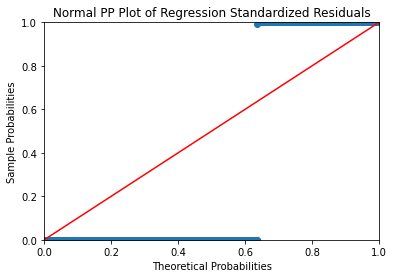

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
insurance_data_resid = model_5.resid
probplot = sm.ProbPlot(insurance_data_resid)
plt.figure(figsize = (8,6))
probplot.ppplot(line = '45')
plt.title('Normal PP Plot of Regression Standardized Residuals')
plt.show()

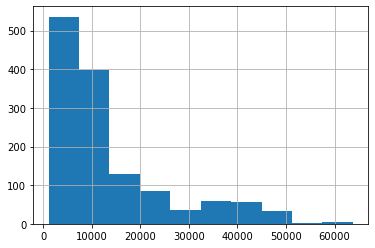

In [29]:
insurance_cost_revised['charges'].hist()
plt.show()

We see that the charges variable is pretty skewed so we can convert the variable into log and then try once more.

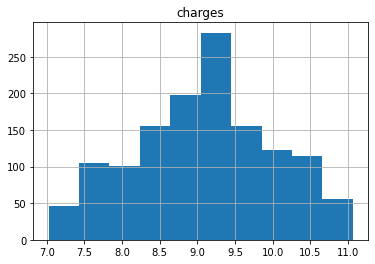

In [30]:
Y_var = np.log(Y_var)
Y_var.hist()
plt.show()

In [31]:
train_X,test_X,train_y,test_y = train_test_split(X_variables,
                                                Y_var,
                                                train_size = 0.80,
                                                random_state = 121)

model_6 = sm.OLS(train_y,train_X).fit()
model_6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.758    
Dependent Variable: charges          AIC:                1334.7357
Date:               2022-05-13 14:46 BIC:                1359.6128
No. Observations:   1070             Log-Likelihood:     -662.37  
Df Model:           4                F-statistic:        838.5    
Df Residuals:       1065             Prob (F-statistic): 0.00     
R-squared:          0.759            Scale:              0.20288  
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const         7.0359     0.0780   90.2337   0.0000   6.8829   7.1889
age           0.0348     0.0010   35.3491   0.0000   0.0329   0.0368
bmi           0.0090     0.0023    3.9727   0.0001   0.0046   0.0135
children      0.0968     0.0113    8.5389   0.0000   0.0746   0.1190
smoker        1.5346     0.0344   44.6469   0.0000   1.4672   1.6020
------------------------------------------------------------------
Omnibus:              377.945      Durbin-Watson:         1.945   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1445.955
Skew:                 1.671        Prob(JB):              0.000   
Kurtosis:             7.611        Condition No.:         291     
==================================================================

"""

This run has not only removed the problem of non-normal residual but has induced following benefits:
- Has reduced values of AIC and BIC meaning prediction power of model has improved
- Has increased adjusted R-Square from 0.745 in first model to 0.758
- Has reduced value of Condition Number which reduced colinearity (although there are other better tests for the same)

<Figure size 576x432 with 0 Axes>

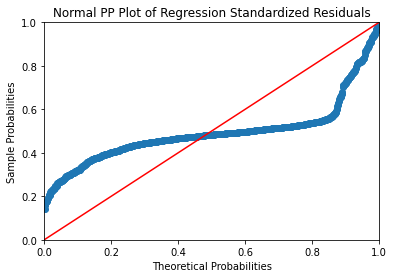

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
insurance_data_resid = model_6.resid
probplot = sm.ProbPlot(insurance_data_resid)
plt.figure(figsize = (8,6))
probplot.ppplot(line = '45')
plt.title('Normal PP Plot of Regression Standardized Residuals')
plt.show()

We have this a lot better than the original model the residual are almost normally distributed and the adjusted R-squared has improved to 0.758 from 0.745

<AxesSubplot:>

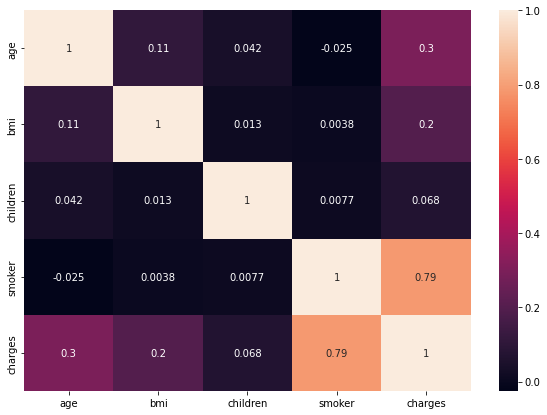

In [33]:
plt.figure(figsize = (10,7))
sns.heatmap(insurance_cost_revised.corr(),annot = True)

Above chart is to display the correlation with the charges and other numerical variables. As is predicted by our model (highest $\beta$ value) smoking has the higest correlation with the insurance charges. 

In [34]:
pred = model_6.predict(test_X)
from sklearn.metrics import r2_score
print("R2 Score",r2_score(test_y,pred))

R2 Score 0.7735003467233176


#### Test for Homoscedasticity
Homoscedasticity measures the distribution of the residual variables, which means that the variance in residual variables doesn't increase much with the increase in the value of Dependent Variable. This can be done by checking the plot of residuals with fitted variable, if the shape is an inverted funnel means that the variance increases (Hetroscedasticity). 
<br>Another test for the same is **Durbin Watson** which should be between 1 & 2, we can see the same in the result of summary of our model its value is 1.945. 

<br>We can remove Hetroscedasticity (opposite of Homoscedasticity) by altering the Independent Variables (taking log or standardizing the variables). We would want the Durbin Watson to be close to Zero and no appearance of inverted funnel.

<br>Another test for performing test for Homoscedasticity is the ```white's``` test. 

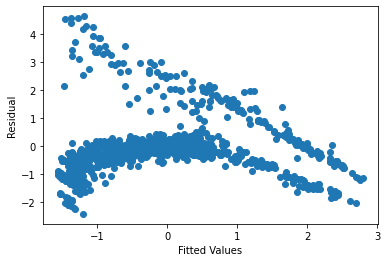

In [35]:
def standardized(vals):
    return((vals-vals.mean())/vals.std())

plt.scatter(standardized(model_6.fittedvalues),standardized(model_6.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

We see that there is a clear sign of Hetroscedasticity.However, if we need to further improve we can take following approaches:
- Transform the x variable
- Transform the y variable (we have already done this when we took the log)

<br>We will confirm our assumption of Hetroscedasticity using white's test.

In [38]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model_6.resid,model_6.model.exog)
labels = ['Test Statistics','Test Statistics p-Value','F-Statistics','F-Test p-value']
#print(dict(zip(labels,white_test)))
print(pd.DataFrame(dict(zip(labels,white_test)).items(),columns = ['Test Label','Test Value']))

                Test Label    Test Value
0          Test Statistics  1.149814e+02
1  Test Statistics p-Value  1.965648e-18
2             F-Statistics  9.779939e+00
3           F-Test p-value  1.485640e-19


In above test both the P-Values are < 0.05 means that we have to reject null hypothesis of Homoscedasticity and therefore there is a presence of Hetroscedasticity. We can attempt to transfer the input variables and see if it causes any benefit. 

<br>Meanwhile we will also plot our Prediction against the actual Y Values to see the distribution. Also, we can see the value of R-Square from the prediction is 0.773 which is close to the actual model means our model is doing a good work on the actual prediction as well. 

R2 Score 0.7735003467233176


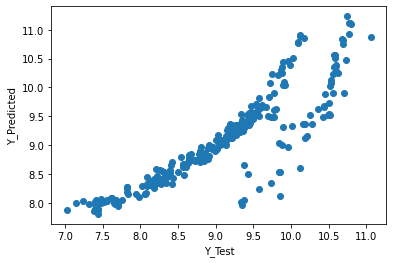

In [40]:
pred = model_6.predict(test_X)
from sklearn.metrics import r2_score
print("R2 Score",r2_score(test_y,pred))
plt.scatter(test_y,pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

##### Attempt to remove Hetroscedasticity by altering independent variables
We will try to change variables one-by-one and see if there is any impact in the hetroscadesticity. 

array([[<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

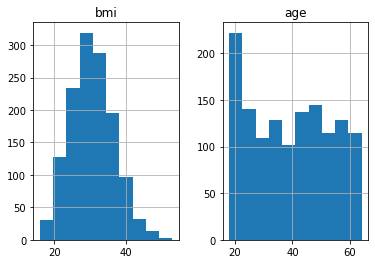

In [38]:
insurance_cost_revised[['bmi','age']].hist()

Let us standardize age variable or all of the input variables. You can comment the relevant section to see the output. 

In [42]:
X_variables = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'charges']
X_variables = sm.add_constant(X_variables)
X_variables['bmi'] = np.log(X_variables['bmi'])
X_variables['age'] = np.log(X_variables['age'])
X_variables['children'] = standardized(X_variables['children'])
X_variables['smoker'] = standardized(X_variables['smoker'])

Y_var = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])
Y_var = np.log(Y_var)
print(Y_var.head())
print(X_variables.head())

train_X,test_X,train_y,test_y = train_test_split(X_variables,
                                                Y_var,
                                                train_size = 0.80,
                                                random_state = 121)

model_7 = sm.OLS(train_y,train_X).fit()
model_7.summary2()

    charges
0  9.734176
1  7.453302
2  8.400538
3  9.998092
4  8.260197
   const       age       bmi  children    smoker
0    1.0  2.944439  3.328627 -0.908274  1.969850
1    1.0  2.890372  3.519573 -0.078738 -0.507273
2    1.0  3.332205  3.496508  1.580335 -0.507273
3    1.0  3.496508  3.122585 -0.908274 -0.507273
4    1.0  3.465736  3.363149 -0.908274 -0.507273


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.761    
Dependent Variable: charges          AIC:                1323.5895
Date:               2022-05-13 15:07 BIC:                1348.4665
No. Observations:   1070             Log-Likelihood:     -656.79  
Df Model:           4                F-statistic:        850.1    
Df Residuals:       1065             Prob (F-statistic): 0.00     
R-squared:          0.761            Scale:              0.20078  
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const         3.5274     0.2512   14.0424   0.0000   3.0345   4.0204
age           1.2612     0.0354   35.5842   0.0000   1.1916   1.3307
bmi           0.3039     0.0677    4.4884   0.0000   0.1710   0.4367
children      0.0916     0.0136    6.7229   0.0000   0.0649   0.1183
smoker        0.6194     0.0138   44.8728   0.0000   0.5923   0.6465
------------------------------------------------------------------
Omnibus:              423.829      Durbin-Watson:         1.930   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1759.764
Skew:                 1.867        Prob(JB):              0.000   
Kurtosis:             8.053        Condition No.:         96      
==================================================================

"""

We have achieved the highest value of R-Squared yet let us do the test for Homoscadisticity and normality of residuals again.
<br>While the homoscedasticity is yet to be evaluated we have achieved a higher value of R-Squared as 0.761 which is a good thing. 

<Figure size 576x432 with 0 Axes>

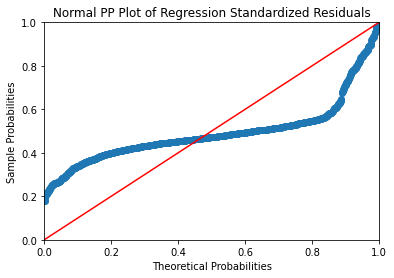

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
insurance_data_resid = model_7.resid
probplot = sm.ProbPlot(insurance_data_resid)
plt.figure(figsize = (8,6))
probplot.ppplot(line = '45')
plt.title('Normal PP Plot of Regression Standardized Residuals')
plt.show()

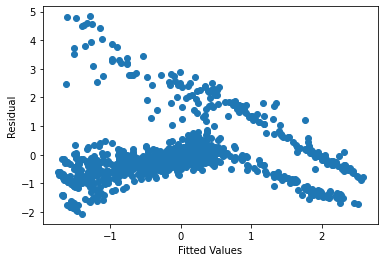

In [44]:
plt.scatter(standardized(model_7.fittedvalues),standardized(model_7.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

In [45]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model_7.resid,model_7.model.exog)
labels = ['Test Statistics','Test Statistics p-Value','F-Statistics','F-Test p-value']
#print(dict(zip(labels,white_test)))
print(pd.DataFrame(dict(zip(labels,white_test)).items(),columns = ['Test Label','Test Value']))

                Test Label    Test Value
0          Test Statistics  1.048361e+02
1  Test Statistics p-Value  1.906163e-16
2             F-Statistics  8.823286e+00
3           F-Test p-value  2.391576e-17


As we can see in the above table the p-values are less than 0.05, which means we have to reject Null hypothesis which is Homoscedasticity is present. Which means that there is presence of hetroscedasticity. So we are unable to remove the Hetroscedasticity from the data. So we will run with Model_7 with improved R-Squared value.

Let us test the values of the predicted Y-Values to understand the accuracy of the model. 

R2 Score 0.7682519851617251


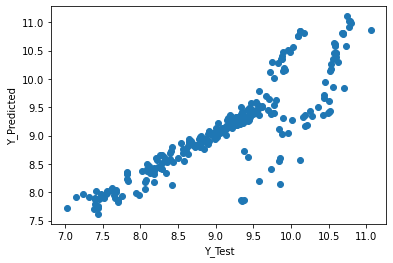

In [46]:
pred = model_7.predict(test_X)
from sklearn.metrics import r2_score
print("R2 Score",r2_score(test_y,pred))
plt.scatter(test_y,pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

This has reduced the value of R-Square for prediction values, so we can go ahead with the Model_6 as the final model. We will run the revised model so Train and Test variables take the correct form. 

In [47]:
insurance_cost_revised = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'region_southeast']
print(insurance_cost_revised.head())


X_variables = insurance_cost_revised.loc[:,insurance_cost_revised.columns != 'charges']
X_variables = sm.add_constant(X_variables)
Y_var = pd.DataFrame(insurance_cost_revised['charges'],columns = ['charges'])
print(Y_var.head())
print(X_variables.head())
train_X,test_X,train_y,test_y = train_test_split(X_variables,
                                                Y_var,
                                                train_size = 0.80,
                                                random_state = 121)

model_6 = sm.OLS(train_y,train_X).fit()
model_6.summary2()

   age     bmi  children  smoker      charges
0   19  27.900         0       1  16884.92400
1   18  33.770         1       0   1725.55230
2   28  33.000         3       0   4449.46200
3   33  22.705         0       0  21984.47061
4   32  28.880         0       0   3866.85520
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520
   const  age     bmi  children  smoker
0    1.0   19  27.900         0       1
1    1.0   18  33.770         1       0
2    1.0   28  33.000         3       0
3    1.0   33  22.705         0       0
4    1.0   32  28.880         0       0


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.745     
Dependent Variable:   charges          AIC:                21695.7401
Date:                 2022-05-13 15:14 BIC:                21720.6172
No. Observations:     1070             Log-Likelihood:     -10843.   
Df Model:             4                F-statistic:        782.3     
Df Residuals:         1065             Prob (F-statistic): 3.93e-315 
R-squared:            0.746            Scale:              3.7276e+07
---------------------------------------------------------------------
            Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
---------------------------------------------------------------------
const    -11146.3650 1056.9188 -10.5461 0.0000 -13220.2447 -9072.4852
age         255.5331   13.3528  19.1371 0.0000    229.3324   281.7338
bmi         294.9581   30.7651   9.5874 0.0000    234.5909   355.3253
children    433.8549  153.6508   2.8236 0.0048    132.3622   735.3475
smoker    23915.9110  465.9029  51.3324 0.0000  23001.7191 24830.1029
---------------------------------------------------------------------
Omnibus:              270.853        Durbin-Watson:           2.006  
Prob(Omnibus):        0.000          Jarque-Bera (JB):        714.539
Skew:                 1.308          Prob(JB):                0.000  
Kurtosis:             6.031          Condition No.:           291    
=====================================================================

"""

##### Testing for Multi-colinearity
To test for multi-coliearity we can check for VIF to check for multi-colinearity the VIF value > 4 means multi-coliniearity. 
<br>Also, condition number is showing in model 6 above that the multi-colinearity has reduced from contition number = 316. 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix = np.matrix(X_variables)
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X_variables.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [45]:
vif_factors  = get_vif_factors(X_variables)
vif_factors

,column,VIF
0,const,339.464829
1,age,1.020902
2,bmi,1.012139
3,children,1.008383
4,smoker,1.000615


##### Identification of any critical line item
If there is any highly influential observation our model may get skewed by that data point. We check this by:
- Leverage Plot
- Cooks Distance

Very large circles on leverage plot means highly influential data point (and we might have to remove them).
Similarly, cooks distance > 1 means there are influential data points. We do both these tests in following segments.

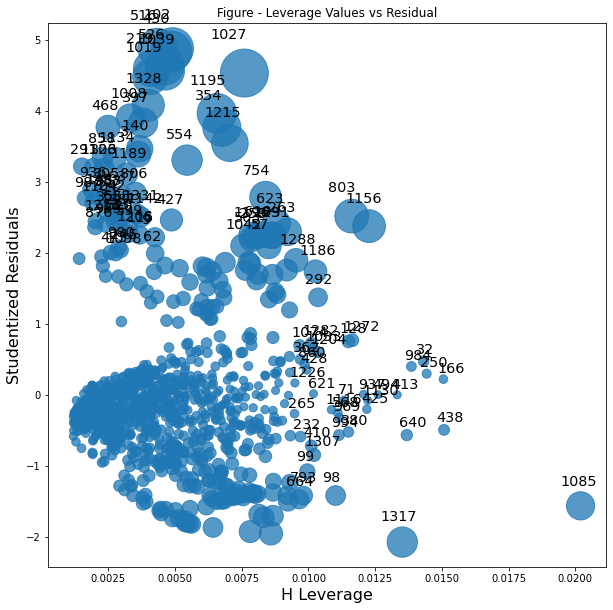

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax = plt.subplots(figsize = (10,10))
influence_plot(model_7,ax = ax)
plt.title("Figure - Leverage Values vs Residual")
plt.show()

Computing the cook's distance

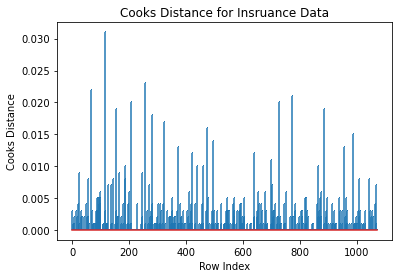

In [50]:
insurance_influence = model_7.get_influence()
(c,p) = insurance_influence.cooks_distance
plt.stem(np.arange(len(train_X)),
        np.round(c,3),
        markerfmt = ',')
plt.title('Cooks Distance for Insurance Data')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### Summarizing
To summarize we follow following steps to create a linear regression model:
- Download the data
- Perform EDA on the data (not covered in this notebook)
- Prepare the data
    - Convert categorical variables into dummy variables (K-1 for K levels of categories in each categorical variables)
- Run the model and try to remove non important variables using Backward Elimination
- Test the models basis the R-Squared of the model on test variables and train variables
- Test for the assumption of statistical model
    - Distribution of Residuals
    - Homoscedasticity
    - Multi-Colinearity
    - Identification and elimination of critical observations

While creation of the model is the first step, arriving at the correct model via testing assumptions is very critical. 

Hope this helps if there is any errata in the above steps/ obervations please do let me know via comments. 
Images are from the python data and remaining images created by hand. 